In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Preprocess the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Outcome', axis=1))

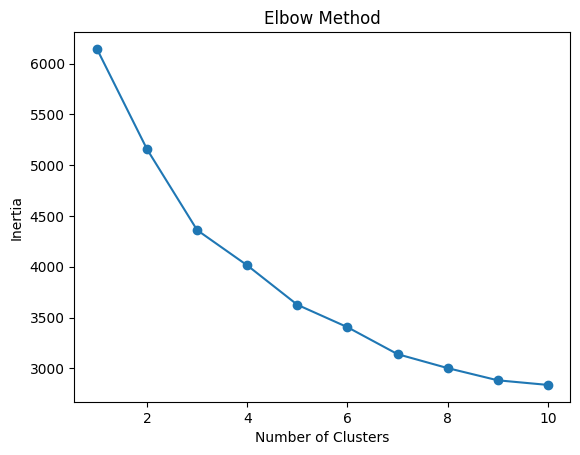

In [4]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [5]:
# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

In [6]:
# Fit the KMeans model to the scaled data
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [7]:
# Assign cluster labels to a variable
labels = kmeans.labels_
print(labels)  


[1 2 1 2 0 2 2 2 0 1 1 1 1 0 1 2 0 1 2 0 0 1 1 1 1 1 1 2 1 1 1 0 2 2 1 0 1
 1 2 0 0 1 1 1 1 0 2 2 1 2 2 2 2 0 0 2 0 0 0 0 2 1 2 0 1 2 2 1 2 0 2 0 1 0
 2 2 1 2 2 2 2 2 1 2 1 0 1 2 1 2 2 0 1 1 2 0 2 2 2 0 0 2 2 2 2 2 2 0 2 2 0
 0 2 2 0 1 1 2 2 2 0 2 2 1 2 0 0 2 0 1 0 1 0 1 2 2 2 2 2 0 1 1 2 1 0 2 1 0
 1 2 0 2 0 0 1 0 2 2 2 1 1 1 0 2 2 1 2 2 2 2 1 0 2 2 2 0 1 0 1 1 2 2 2 2 1
 1 0 0 0 0 2 1 1 1 1 0 2 2 0 0 2 2 2 2 1 2 0 1 2 1 2 0 1 0 1 0 0 0 2 1 0 1
 2 1 2 2 2 0 0 0 1 0 2 2 2 1 1 0 1 2 2 2 2 0 0 1 1 0 0 2 1 2 2 2 1 2 2 2 0
 1 0 2 2 1 2 1 2 0 2 2 1 2 1 2 1 0 2 2 1 2 2 1 1 1 1 1 0 0 2 0 2 2 0 0 1 0
 0 0 1 1 2 0 2 1 1 0 1 2 0 0 2 0 2 2 1 2 2 1 0 1 2 2 2 1 2 2 0 1 0 1 1 2 2
 1 2 0 2 1 0 1 2 2 2 1 1 1 2 2 2 2 2 1 2 2 2 1 0 1 1 0 0 1 1 1 0 2 1 2 2 0
 0 2 2 2 0 0 2 2 1 0 2 2 2 2 2 2 1 1 0 2 0 1 0 2 1 0 2 2 2 0 2 1 0 1 1 0 1
 2 1 0 0 0 0 2 0 0 2 0 2 2 0 2 0 2 0 0 2 0 0 0 2 2 2 2 2 2 1 1 2 1 0 2 2 1
 2 0 2 0 2 2 2 2 0 1 2 1 1 2 0 1 1 2 1 2 1 2 2 2 2 0 0 2 2 1 2 1 0 1 1 1 0
 2 2 2 2 0 0 0 2 1 2 2 2 

In [8]:
# Import necessary libraries for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

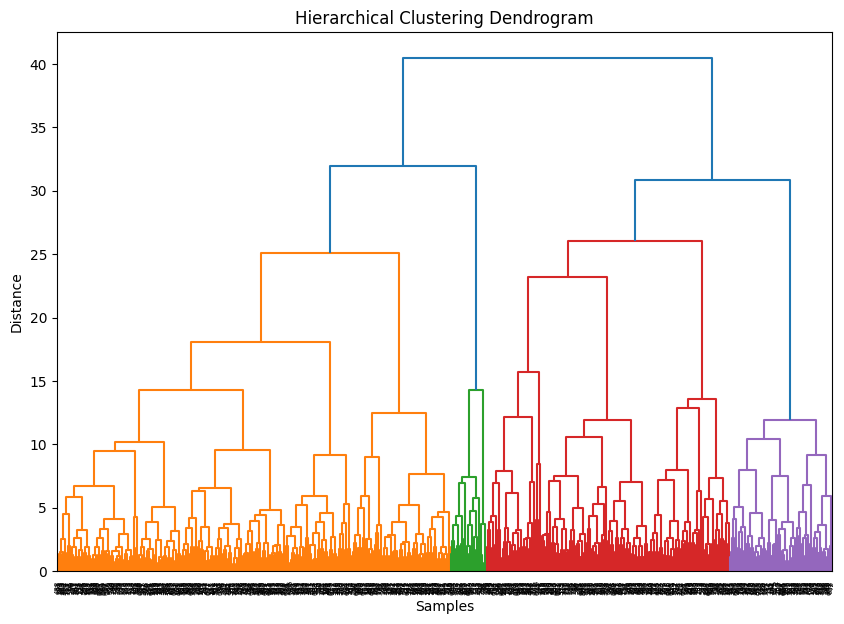

In [9]:
# Perform hierarchical clustering and plot the dendrogram
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [10]:
# Perform Agglomerative Clustering with a chosen number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierarchical_clusters = hierarchical_clustering.fit_predict(scaled_data)

# Add hierarchical cluster labels to the original dataset
data['Hierarchical_Cluster'] = hierarchical_clusters
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Hierarchical_Cluster
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,0


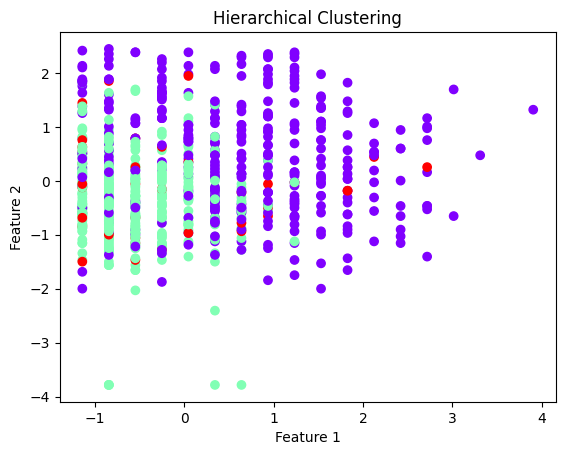

In [11]:
# Visualize the hierarchical clusters (example using the first two features)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hierarchical_clusters, cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical Clustering')
plt.show()